In [2]:
import cv2
import numpy as np
from scipy.optimize import curve_fit

# Load and resize the image
img = cv2.imread('irr-rescale.png')
img_resized = cv2.resize(img, (1000, 1000))#need to rescale afterwards

# Convert to grayscale and apply binary thresholding
gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours and filter based on area
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
inner_contours = [cnt for cnt in contours if cv2.contourArea(cnt) < 800000]
# Draw inner contours
for cnt in inner_contours:
    cv2.drawContours(img_resized, [cnt], -1, (0, 255, 0), 5)

# Process the first inner contour if available
if inner_contours:
    cnt = inner_contours[0]
    points = cnt[:, 0, :]
    x = points[:, 0] - 500  # Centering
    y = points[:, 1] - 500

    # Convert to polar coordinates
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    # Define a Fourier series fitting function
    def fourier_series(theta, *params):
        a0 = params[-1]
        result = a0
        n = (len(params) - 1) // 2
        for i in range(1, n + 1):
            result += params[2 * i - 1] * np.cos(i * theta) + params[2 * i] * np.sin(i * theta)
        return result

    # Initial guess for Fourier series coefficients
    initial_params = [1]* 40  # Adjust the number of parameters as needed 40

    # Fit the Fourier series to the data
    params, _ = curve_fit(fourier_series, theta, r, p0=initial_params)

    # Print fitted parameters
    print("Fitted Fourier Series Parameters:")
    print(", ".join(f"{i}: {params[i]:.4f}" for i in range(len(params))))

    # Generate fitted values
    theta_fit = np.linspace(min(theta), max(theta), 5000)
    r_fit = fourier_series(theta_fit, *params)

    # Convert fitted polar coordinates back to Cartesian
    x_fit = r_fit * np.cos(theta_fit) + 500
    y_fit = r_fit * np.sin(theta_fit) + 500

    # Draw the fitted function on the image
    for i in range(len(x_fit) - 1):
        cv2.line(img_resized, (int(x_fit[i]), int(y_fit[i])), (int(x_fit[i + 1]), int(y_fit[i + 1])), (255, 0, 0), 3)
  

# Display the result
cv2.imshow('Contours', img_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

Fitted Fourier Series Parameters:
0: 1.0000, 1: 47.4675, 2: -58.2456, 3: 1.0698, 4: -58.8535, 5: -34.7631, 6: -40.3199, 7: 60.8791, 8: 5.2405, 9: -33.2512, 10: 29.1394, 11: 2.6775, 12: 18.4128, 13: 8.7349, 14: 6.3884, 15: 19.6371, 16: 0.6006, 17: -0.9649, 18: 0.9762, 19: 1.5915, 20: 2.1848, 21: -0.7266, 22: 0.9912, 23: -15.6072, 24: -2.9277, 25: 5.2133, 26: -1.4410, 27: -0.1094, 28: 2.5198, 29: -0.3532, 30: 0.5715, 31: -12.1501, 32: -2.4027, 33: 4.3499, 34: -1.7018, 35: -0.1294, 36: -3.0618, 37: -2.4669, 38: -2.7784, 39: 404.8333


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import pandas as pd
from scipy.optimize import fsolve 
import sys
import time
from scipy import optimize
from numpy import savetxt
Dimensions=400
Dimensions_1 = 200
Dimensions_2= 200
PI = np.pi
P=0.5
Q=4
A=0.05 #Amplitude Parameter
global Dimensions, PI, R_0, DEGREE, P, Q, A
C_RANGES= np.reshape(np.linspace(1e-12, 0.999999, Dimensions), (-1,1))
#a1=np.linspace(1e-12,0.5-(0.999-0.5)/Dimensions_2, Dimensions_1) 
#a2=np.linspace(0.5,0.999, Dimensions_2) 
#C_RANGES= np.reshape(np.concatenate((a1, a2), axis=0), (-1,1))
THETA_RANGES = np.linspace(0, 2*PI, Dimensions)

In [4]:
def pertubation(theta):
    return fourier_series(theta, *params)/500  #factor 500 is used to rescale so that 1 unit length =10.67 micrometers.
print(pertubation(theta))

[0.96024042 0.95986096 0.95948121 0.95912794 0.95229838 0.95124995
 0.94511402 0.94414991 0.94104741 0.94175587 0.94618876 0.94578709
 0.94386375 0.94334574 0.94245467 0.9418922  0.94142122 0.94083467
 0.94034826 0.93726344 0.93714182 0.93651534 0.93639245 0.93514787
 0.93502443 0.93321787 0.9327589  0.93164948 0.93123344 0.93072598
 0.92899682 0.92863022 0.92740655 0.92725633 0.92714744 0.92725796
 0.92902388 0.92950649 0.94022979 0.94145544 0.97657211 0.97736828
 0.99533398 0.99613924 0.99768048 0.99848262 1.00002763 0.9992824
 1.00007979 0.99933771 1.00013148 0.99939253 1.00018272 0.99944687
 1.00023351 0.99950073 1.00416339 1.00567157 1.007964   1.00946934
 1.01022616 1.01323909 1.0139886  1.02153489 1.02226806 1.13188122
 1.1323492  1.20498191 1.20522912 1.23717308 1.23874609 1.24916052
 1.25037025 1.25441588 1.2554044  1.25730671 1.25814343 1.25895751
 1.25969208 1.26005132 1.26070899 1.26102727 1.26213553 1.26238559
 1.26283485 1.2630436  1.26399352 1.26410647 1.2640623  1.26394

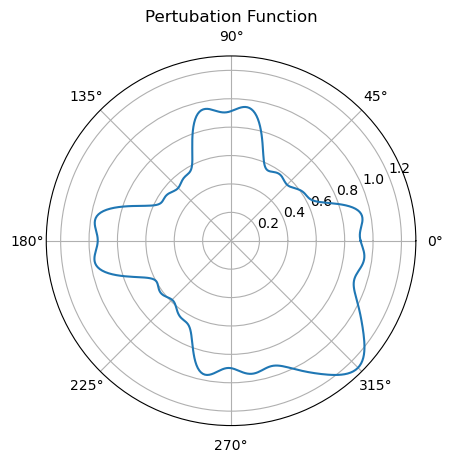

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define theta values
theta_values = np.linspace(0, 2*PI, Dimensions)  # Adjust start, end, num_points as needed
results = [pertubation(theta) for theta in theta_values]

# Plotting
# plt.plot(theta_values, results)
# plt.title('Pertubation Function')
# plt.xlabel('Theta')
# plt.ylabel('Pertubation Value')
# plt.grid()
# plt.show()
# Plotting in polar coordinates
plt.polar(theta_values, results)
plt.title('Pertubation Function')
plt.show()

In [6]:
#1 unit =10.67 micrometers.
def dev_pertubation(theta, params):
    return 1.0/500*params[0] * sum(
        (params[i] * (i // 2 + 1) * np.cos((i // 2 + 1) * theta) if i % 2 == 0 
         else -params[i] * (i // 2 + 1) * np.sin((i // 2 + 1) * theta))
        for i in range(1, len(params))
    )
def radius(theta, c,m, P, Q):
    pertu = pertubation(theta)
    scalling = 1/(np.power((1+c), m))
    r = scalling*np.power(1-c, P)*params[-1]/500+np.power(1-c, Q)*(pertu-params[-1]/500)###use R_0=0.561 to sure the surface = 1
    return r
def Dev_r_theta(theta, c, P, Q):
    dev_per = dev_pertubation(theta, params)
    d_r = np.power((1-c), Q)*dev_per
    return d_r

def Dev_r_c(theta, c, m, P, Q):
    pertu = pertubation(theta)
    A = 1/(np.power((1+c), m))
    B = np.power(1-c, P)*params[-1]
    dA = -m*np.power(1+c, -m-1)
    dB = -P*np.power(1-c, P-1)*params[-1]/500
    dC = -(pertu-params[-1]/500)*Q*((1-c)**(Q-1))####require C != 1, when C == 1, there will be a signarity.
    d_r = A*dB+B*dA+dC
    return d_r

def Dev_h_c(c, n):
    global Dimensions, PI, R_0, DEGREE, P, Q, A
    d_h = n*np.power(c, n-1)####set c_max=1
    return d_h

def Height_volume(v, n, M, Radius, Theta_ranges, C_ranges):
    dimen_c = len(C_ranges)
    
    d_theta = Theta_ranges[1]-Theta_ranges[0]#(Theta_ranges[-1]-Theta_ranges[0])/Dimensions
    C_RANGES_diff = np.diff(C_ranges, axis=0)
    C_RANGES_diff = np.reshape(np.append(C_RANGES_diff, C_RANGES_diff[-1,0] ), (-1,1))
    d_c = C_RANGES_diff
    d_base_area = 0.5*(Radius**2)*d_theta


    d_h = Dev_h_c(C_ranges, n)
    dv = (d_base_area*d_h)*d_c

    volume = np.sum(dv)

    H = v/volume
     
    d_r_theta = Dev_r_theta(Theta_ranges, C_ranges, P,Q)
    d_r_c = Dev_r_c(Theta_ranges, C_ranges, M,P,Q)
  
    d_h_c = H*d_h
    
    
    ds = np.sqrt(Radius**2+d_r_theta**2)*d_theta
    dl = np.sqrt(d_r_c**2+d_h_c**2)*d_c
    
    surface = ds*dl

    
    surface_size = np.sum(surface)
    
    return H, surface_size

def Main(v, n_ranges, m_ranges, Theta_ranges, C_ranges):
    n_length = len(n_ranges)
    m_length = len(m_ranges)
    surface_matrix = np.zeros((m_length, n_length))
    height_matrix = np.zeros((m_length, n_length))
    for i in range(m_length):
        Radius = radius(Theta_ranges, C_ranges, m_ranges[i],P,Q)
        for j in range(n_length):
            height, surface = Height_volume(v, n_ranges[j], m_ranges[i], Radius, Theta_ranges, C_ranges)
            surface_matrix[i][j] = surface
            height_matrix[i][j] = height
    surface_min = surface_matrix.min()
    index = np.where(surface_matrix==np.min(surface_matrix))
    height_min = height_matrix[index][0]
    return surface_min, height_min, surface_matrix, m_ranges[index[0]], n_ranges[index[1]]

In [17]:
m_ranges = np.arange(-1, 1, 0.01)
n_ranges = np.arange(0.6,2, 0.01)
Volume = [0.4]#,0.5,1]#[0.06,0.10,0.14, 0.18,0.5, 1, 1.5]0.39
Surface = []
Height = []
Energy = []
m_matrix = []
n_matrix = []
for v in Volume:
    s,h,e,m,n = Main(v, n_ranges, m_ranges, THETA_RANGES, C_RANGES)
    Surface.append(s)
    Height.append(h)
    Energy.append(e)
    m_matrix.append(m)
    n_matrix.append(n)

In [18]:
Height

[0.5769655319935106]

In [19]:
Surface

[9.8167828101053]

In [20]:
m_matrix

[array([8.8817842e-16])]

In [21]:
n_matrix

[array([1.99])]

In [22]:
# surface_energy = Energy[0]
# Volume_sim = [0.06,0.10,0.14, 0.18,0.5, 1, 1.5]
# SS_sim = np.array([10395,11578,12986,14179,25421,41766,55506])*1e-4
# HH_sim = (np.array([20.61,27.72,34.06,39.19,71.78,102.28,122.06])-5)*0.01
Radius = radius(THETA_RANGES, C_RANGES, m_matrix[0],P,Q)#####for droplet with volume = 0.18
# Radius.shape
x = Radius*np.cos(THETA_RANGES)
y = Radius*np.sin(THETA_RANGES)
z = Height[0]*(C_RANGES)**n_matrix[0]######Change Here!
z_0 = np.ones(THETA_RANGES.shape[0])

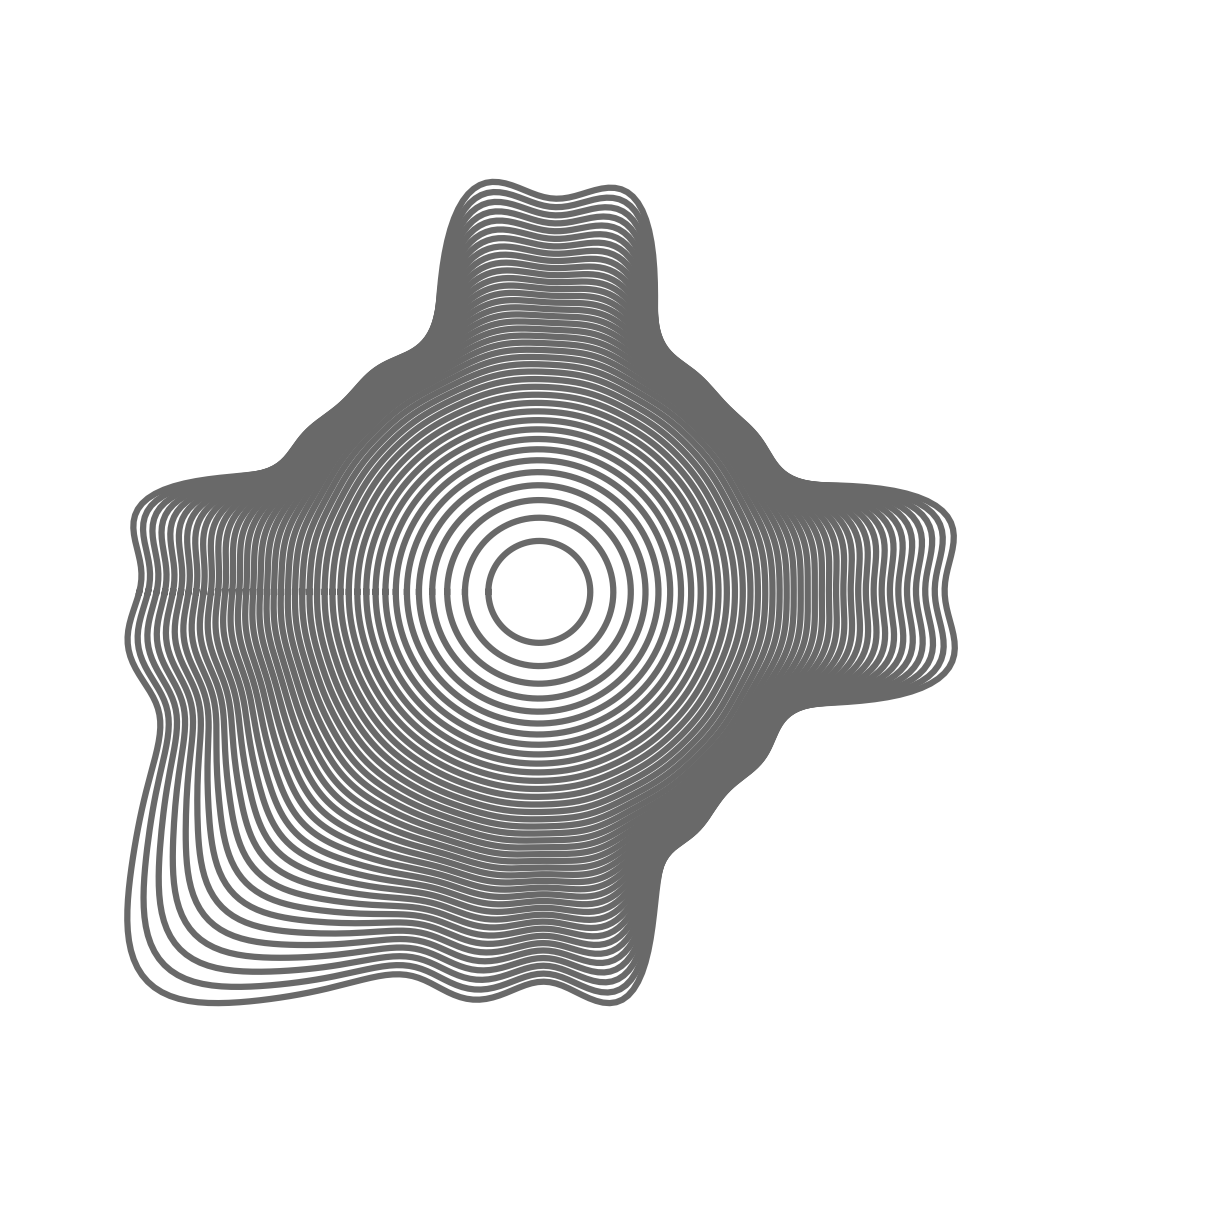

In [25]:
fig = plt.figure(figsize = (5,5), dpi=300)
#fig = plt.figure(figsize=plt.figaspect(1)*2)
ax = plt.axes(projection='3d')
#ax.view_init(elev=-90, azim=0, roll=0)
#ax.view_init(elev=-3, azim=0)
ax.view_init(elev=-90, azim=90)
#ax.view_init(elev=20, azim=90)
plt.axis("equal")
ax.set_box_aspect([1,1,1])
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))



for i in np.arange(0,Dimensions,10):
        ax.plot(x[i], y[i], z_0*z[i],color='dimgrey')
#ax.plot(x[190],y[190],z_0*z[190])
#ax.plot(x[5],y[5],z_0*z[5])
ax.set_zlim(0, 1.6)
ax.set_xlim(-1, 0.6)
ax.set_ylim(-0.8, 0.8)


ax.set_axis_off()
ax.grid(False)
#fig.savefig('contour_3Dhex01.pdf', bbox_inches='tight')

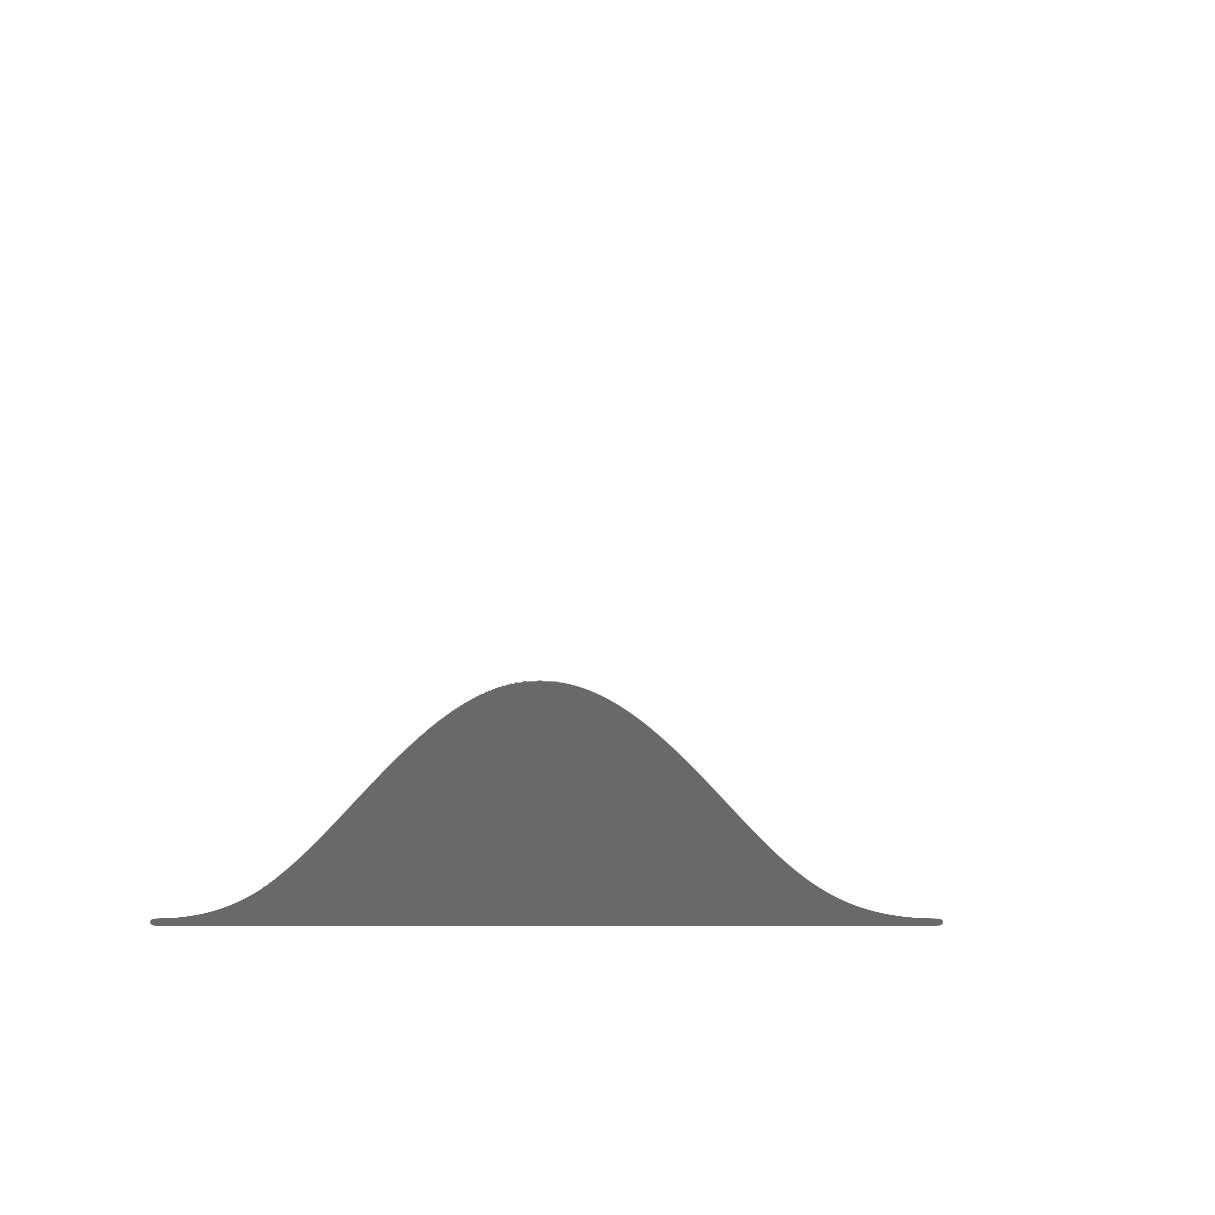

In [24]:
fig = plt.figure(figsize = (5,5), dpi=300)
#fig = plt.figure(figsize=plt.figaspect(1)*2)
ax = plt.axes(projection='3d')
#ax.view_init(elev=-90, azim=0, roll=0)
ax.view_init(elev=-3, azim=90)
# #ax.view_init(elev=-3, azim=0)
#ax.view_init(elev=-90, azim=90)
#ax.view_init(elev=20, azim=90)
plt.axis("equal")
ax.set_box_aspect([1,1,1])
# ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))



for i in np.arange(0,Dimensions,1):
        ax.plot(x[i], y[i], z_0*z[i],color='dimgrey')
#ax.plot(x[190],y[190],z_0*z[190])
#ax.plot(x[5],y[5],z_0*z[5])
ax.set_zlim(0, 1.6)
ax.set_xlim(-1, 0.6)
ax.set_ylim(-0.8, 0.8)


ax.set_axis_off()
ax.grid(False)
fig.savefig('contour_3Dhex01.pdf', bbox_inches='tight')